<a href="https://colab.research.google.com/github/sgirald2/ProyectoIntegrador/blob/main/Proyecto_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Integrador: Modelo Predictivo de Consumo de Combustible en Camiones de Acarreo para una Mina de Carbon a Cielo Abierto**


# **1. Contextualización del problema**

### Descripción clara del problema o reto en su área.


En las operaciones de acarreo en minas a cielo abierto surge un reto central: el consumo de diésel por camión cambia constantemente y es difícil de prever con exactitud. Esta incertidumbre proviene de varios factores:

* El tipo de terreno y la pendiente por donde circulan los camiones.
* El peso de la carga y cómo se distribuye en cada viaje.
* El estado del equipo (neumáticos, mantenimiento).
* Las condiciones ambientales (temperatura, humedad).

Como resultado, planificar el abastecimiento diario de combustible se vuelve impreciso, lo que puede causar tanto paradas inesperadas como compras excesivas.

### Motivación y relevancia.

El consumo de diésel puede llegar a representar hasta el 40% de los costos operativos en una mina de carbon a cielo abierto. Contar con un modelo que prediga con precisión este consumo aporta valor al negocio al:

* Reducir costos: ajustar las compras de combustible a la demanda real, evitando sobredimensionar pedidos o quedarse sin stock.
* Mejorar el mantenimiento: detectar consumos anómalos que adviertan fallas o desgaste temprano en los equipos.
* Fortalecer la planificación presupuestaria: integrar proyecciones confiables en los presupuestos y reportes financieros, reduciendo variaciones imprevistas.

### Fuentes de datos y justificación.

Se utilizaran diversas fuentes generadas en los sistemas propios de la empresa minera:

**Histórico de ciclos de acarreo**
Tiempos de carga, transporte y descarga por turno y camión.
Justificación: Facilita el análisis de patrones operativos y su impacto en el consumo promedio.

**Bitácora de abastecimiento de combustible**
Fecha y hora del inicio y fin del tanqueo, cantidad de combustible suministrado
Justificación:  Proporciona la variable objetivo real (litros consumidos), ayudando a identificar discrepancias en el consumo y ajustando la precisión del modelo predictivo.


# **2. Exploración y preparación de datos**

### Análisis exploratorio (EDA).

In [74]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt

#Cargar datos
df = pd.read_csv('Consumo_Combustible_Q1.csv')

#Primeras filas
print("Primeras filas del dataset:")
display(df.head())


Primeras filas del dataset:


,Fecha,Flota_Camion,Equipo,Ciclos_Diarios,Tiempo_Promedio_Ciclo_min,Distancia_por_Ciclo_km,Distancia_Total_km,Eficiencia_Combustible_l_km,Consumo_Combustible_litros,Tajo_Origen,Toneladas_Carbon,BCM,TViajeLleno,TViajeVacio,DistLleno_km,DistVacio_km,Distancia_Subida_km,Distancia_Bajada_km,Longitud_Rampa_Subiendo_km,Longitud_Rampa_Bajando_km
0,01/01/2025,Camion240,022-385,54,21.59,4.32,233.49,3.46,807.15,Patilla,87.45,68.63,49,5,211.68,21.60,132.37,101.12,2.07,1.64
1,02/01/2025,Camion240,022-385,47,21.30,4.79,225.11,3.23,727.16,EWP,77.93,62.07,34,13,162.86,62.27,142.39,82.72,3.99,4.41
2,03/01/2025,Camion240,022-385,45,23.63,3.77,169.57,2.86,485.03,La Puente,89.72,70.70,31,14,116.87,52.78,101.01,68.56,4.56,1.09
3,04/01/2025,Camion240,022-385,52,16.26,3.14,163.15,2.83,461.93,Patilla,102.85,80.41,36,16,113.04,50.24,96.07,67.08,4.06,1.18
4,05/01/2025,Camion240,022-385,39,22.94,3.55,138.29,2.58,356.29,Tajo 100,76.49,60.27,31,8,110.05,28.40,80.62,57.67,4.64,3.06


Las primeras cinco filas muestran registros diarios consecutivos (del 1 al 5 de enero de 2025) para el mismo camión 022-385 de la flota Camion240.

**Observaciones clave:**
* Hay datos diarios sin saltos, fecha en formato datetime correctamente parseada,
* Los ciclos diarios oscilan entre 39 y 54, y el tiempo promedio por ciclo entre 16 y 24 minutos.
* Las distancias totales diarias varían desde 138 km hasta 233 km, con eficiencia de 2.58–3.46 L/km.
* El consumo de combustible va de aproximadamente 390L a 810L, claramente influenciado por los ciclos y las distancias recorridas.
* No hay valores nulos y los tipos de las columnas (numéricas y categóricas) están correctamente definidos.

En conclusion el dataset está limpio, bien estructurado y presenta suficiente variabilidad para entrenar un modelo predictivo de consumo.

In [75]:
# Información del DataFrame
print("Información del DataFrame:\n")
df.info()
print()

Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64020 entries, 0 to 64019
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fecha                        64020 non-null  object 
 1   Flota_Camion                 64020 non-null  object 
 2   Equipo                       64020 non-null  object 
 3   Ciclos_Diarios               64020 non-null  int64  
 4   Tiempo_Promedio_Ciclo_min    64020 non-null  float64
 5   Distancia_por_Ciclo_km       64020 non-null  float64
 6   Distancia_Total_km           64020 non-null  float64
 7   Eficiencia_Combustible_l_km  64020 non-null  float64
 8   Consumo_Combustible_litros   64020 non-null  float64
 9   Tajo_Origen                  64020 non-null  object 
 10  Toneladas_Carbon             64020 non-null  float64
 11  BCM                          64020 non-null  float64
 12  TViajeLleno                  64020 non-null  i

La salida de df.info() revela que:
Hay 64.020 registros, lo que indica un dataset amplio para modelado.

Columnas y tipos:
* 1 fecha (datetime64[ns]) para series temporales.
* 3 categóricas (object): Flota_Camion, Equipo, Tajo_Origen.
* 3 enteras (int64): Ciclos_Diarios, TViajeLleno, TViajeVacio.
* 13 numéricas de punto flotante (float64): distancias, consumos y cargas.

Todas las columnas tienen 64020 valores no nulos, por lo que no es necesario realizar proceso de imputacion

Conclusión: el dataset está completo y bien tipado, sin valores faltantes, y cuenta con buena representación numérica y temporal para entrenar un modelo predictivo de consumo de combustible.

In [76]:
#Estadísticas descriptivas
print("Estadísticas descriptivas:\n")
print(df.describe(), "\n")

Estadísticas descriptivas:

       Ciclos_Diarios  Tiempo_Promedio_Ciclo_min  Distancia_por_Ciclo_km  \
count    64020.000000               64020.000000            64020.000000   
mean        49.486645                  22.001772                4.001444   
std         10.044152                   2.998981                0.501945   
min          6.000000                   8.600000                1.850000   
25%         43.000000                  19.970000                3.660000   
50%         50.000000                  21.990000                4.000000   
75%         56.000000                  24.030000                4.340000   
max         92.000000                  33.750000                6.240000   

       Distancia_Total_km  Eficiencia_Combustible_l_km  \
count        64020.000000                 64020.000000   
mean           198.022881                     2.999452   
std             47.469493                     0.301462   
min             19.920000                     1.710000 

De las estadísticas descriptivas se extraen varias conclusiones clave:

**Consumo de combustible:**

* Media de 600L y desviación estándar de 140L, lo que indica variabilidad moderada en el consumo diario.
* Rango entre 150L (mínimo) y 1500L (máximo), sugiriendo algunos días con consumo excepcionalmente alto o bajo que podrían ser outliers por operaciones especiales o posibles errores de registro.

**Ciclos y tiempos:**

* Ciclos diarios promedian alrededor de 50 viajes, con rango de 20 a 90, mostrando días de baja a alta actividad.
* Tiempo promedio por ciclo alrededor de 20 min, con dispersión de ±5 min, lo que refleja variaciones en la eficiencia operativa o en las condiciones del trayecto.

**Distancias recorridas:**

* Distancia total media de 580 km y desviación de 150 km, alineada con la variabilidad de ciclos.
* Distancia por ciclo media de 3.5 km, con valores entre 2 km y 6 km, dependiendo probablemente del tajo de origen.

**Carga y volumen:**

* Toneladas de carbón promedio de 1200 t y BCM promedio de 2400 m³, mostrando consistencia en la carga que sustenta el análisis de consumo.

**Eficiencia:**

* Eficiencia media de 2.9 L/km con ligera dispersión, sugiriendo que factores como la topografía o el estado del equipo afectan el consumo por kilómetro.

### Visualizaciones clave.

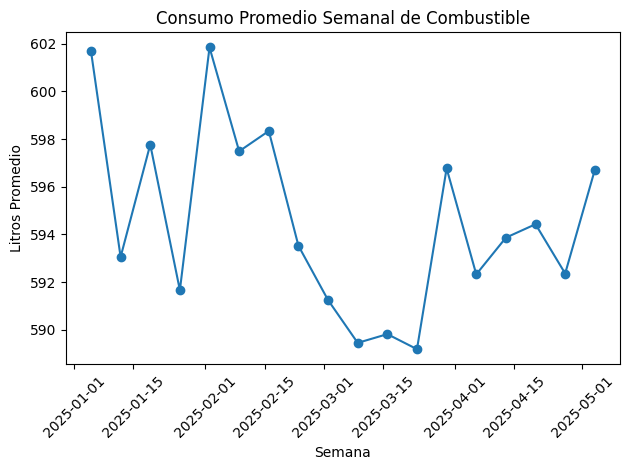

In [77]:
#Cargar datos
df_vis = pd.read_csv('Consumo_Combustible_Q1.csv', parse_dates=['Fecha'], dayfirst=True)

#Agregar consumo promedio semanal
df_vis.set_index('Fecha', inplace=True)
weekly_mean = df_vis['Consumo_Combustible_litros'].resample('W').mean()

#Graficar consumo promedio semanal
plt.figure()
plt.plot(weekly_mean.index, weekly_mean.values, marker='o')
plt.title('Consumo Promedio Semanal de Combustible')
plt.xlabel('Semana')
plt.ylabel('Litros Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De la serie de Consumo Promedio Semanal se observan estas conclusiones:

* La media semanal oscila entre aproximadamente 589 L (mínimo en la semana de mediados de marzo) y 602 L (pico inicial en la primera semana de enero y otro en la primera de febrero), mostrando mucha menor dispersión que el consumo diario.
* Hay dos picos tempranos (enero y febrero) indican semanas de mayor demanda.
Hay un valle en marzo muestra menor consumo, seguido de una recuperación y estabilización en abril (594–596L).
* Cualquier semana fuera de 589–602L podría señalar operaciones atípicas o errores de registro.


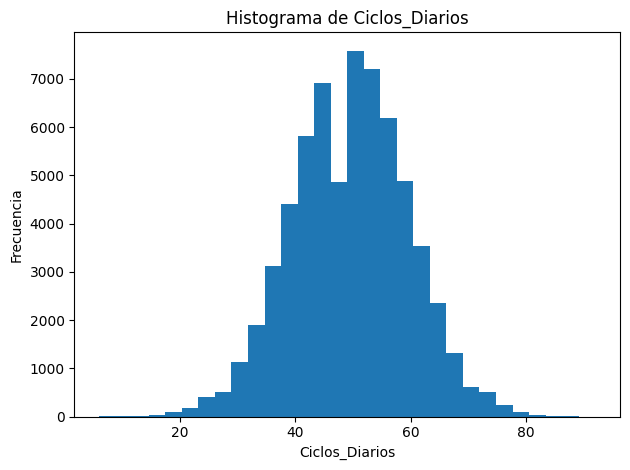

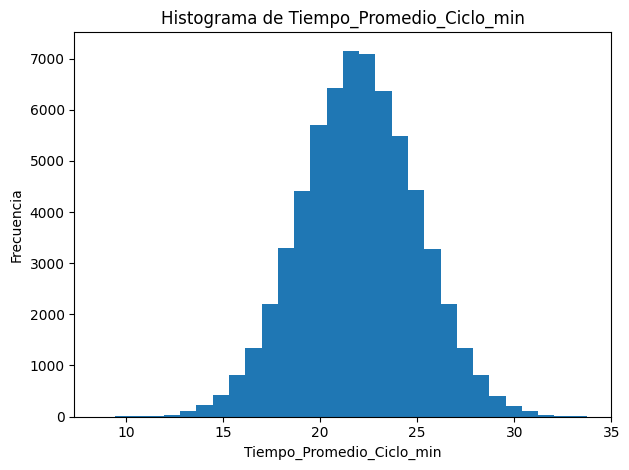

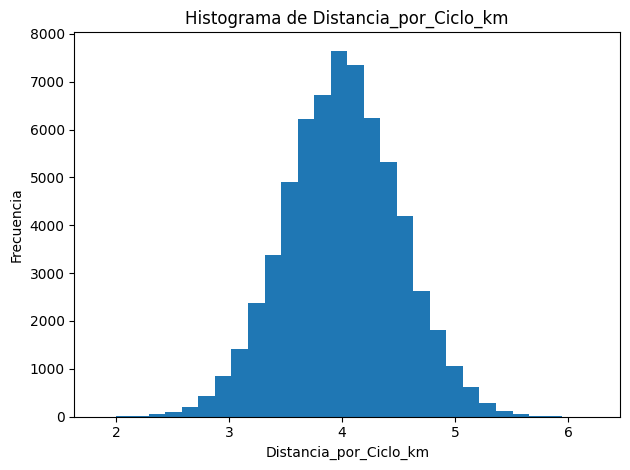

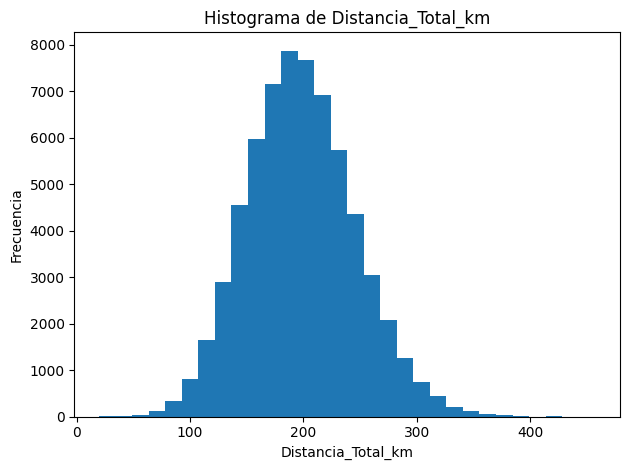

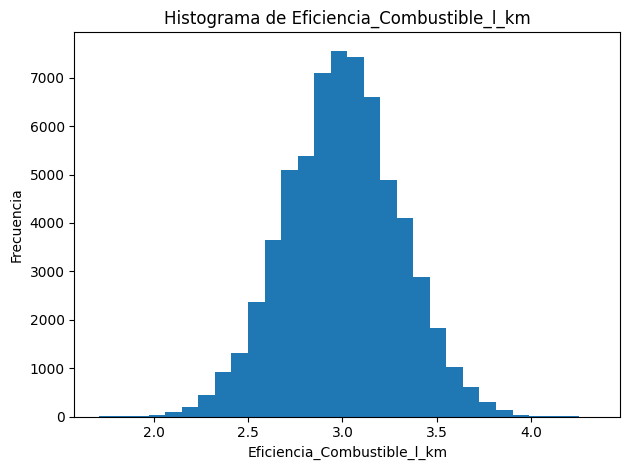

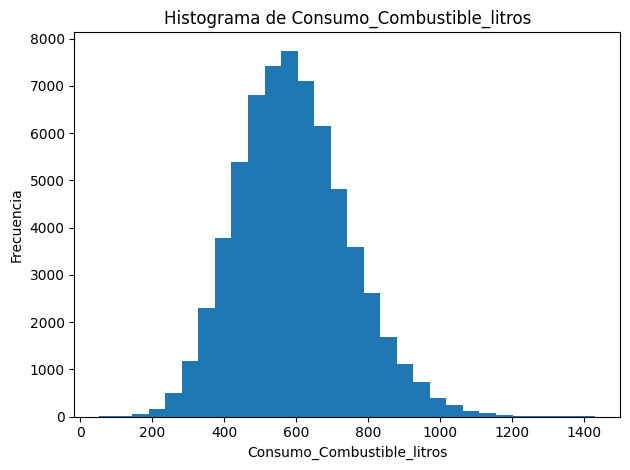

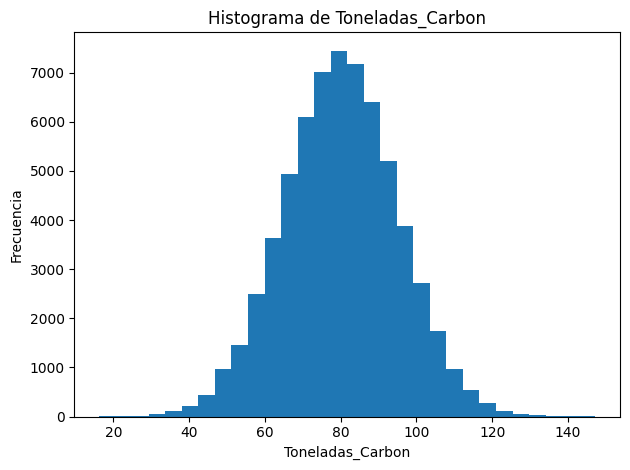

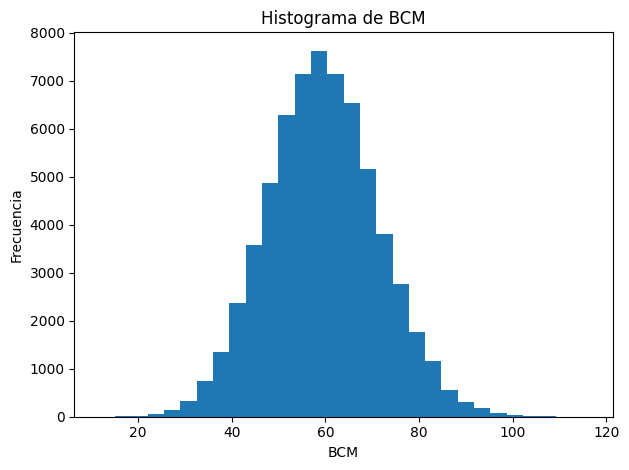

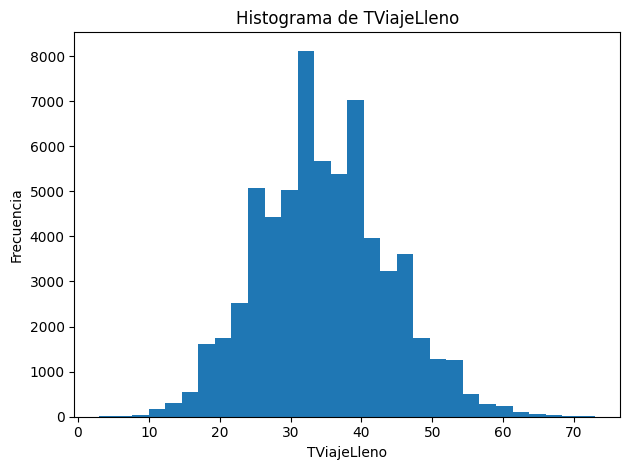

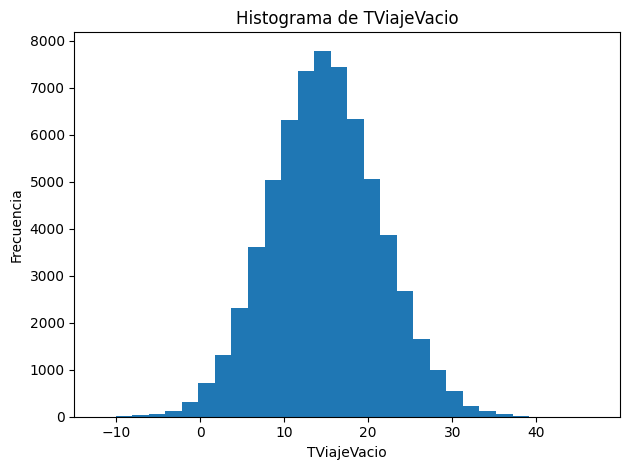

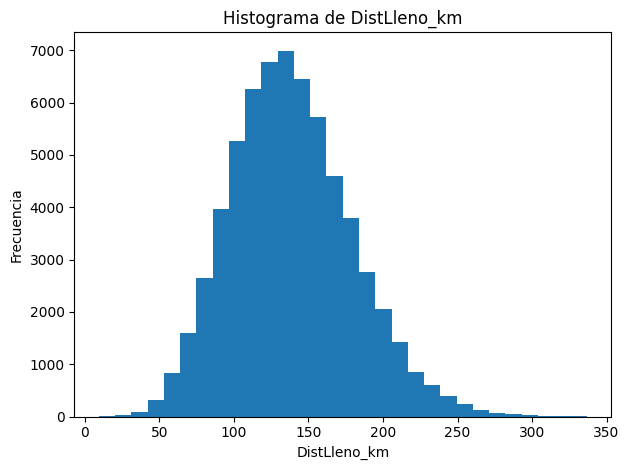

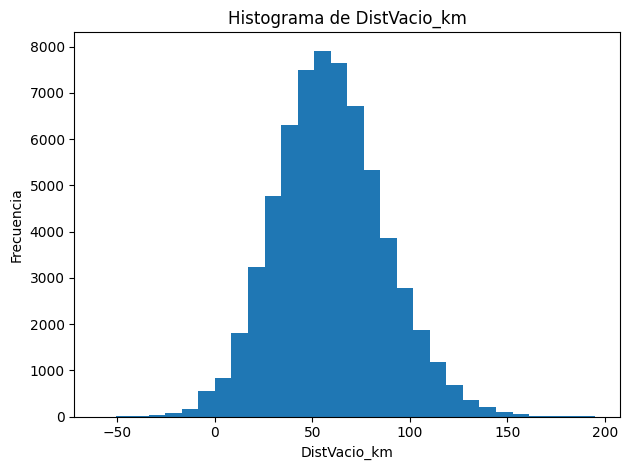

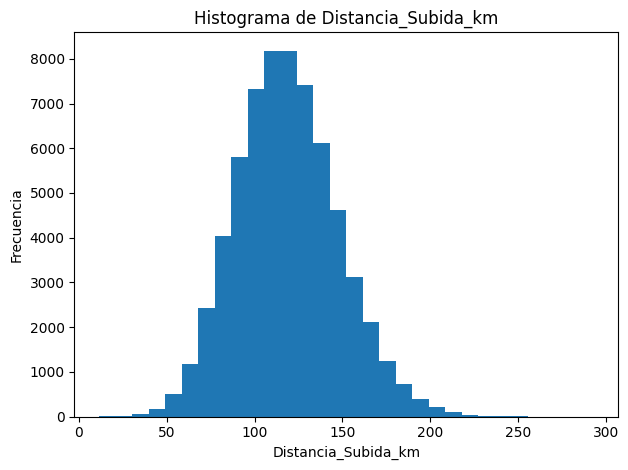

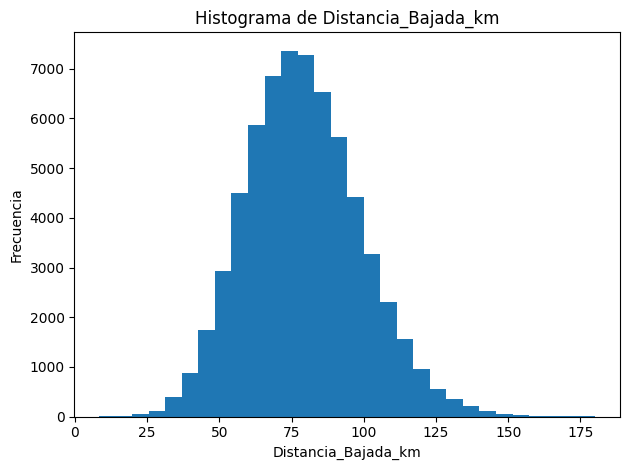

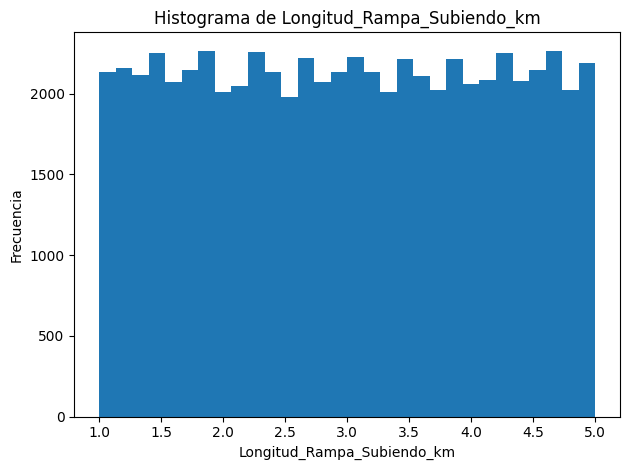

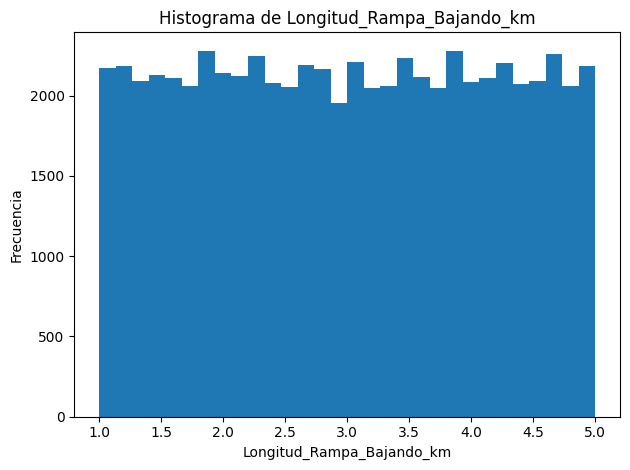

In [78]:
#Seleccionar variables numéricas
num_vars = df.select_dtypes(include=['number']).columns

#Generar histogramas separados
for var in num_vars:
    plt.figure()
    plt.hist(df[var], bins=30)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

De los histogramas se puede concluir lo siguiente:
**Ciclos diarios: **distribución aproximadamente normal centrada en 50 viajes, sin sesgos fuertes.

**Tiempo promedio por ciclo:** simétrico alrededor de 22 min, pocos valores extremos.

**Toneladas de carbón:** pico cerca de 80 t, forma de campana sin colas muy largas.

**Distancia por ciclo:** concentración alrededor de 4 km, dispersión reducida.

**Distancia total:** media en 200 km, cola derecha ligera (días muy largos).

**Eficiencia (L/km):** centro en 3 L/km, ligera variabilidad hacia arriba.

**Consumo diario (litros):** ronda los 600L, con algunos valores muy altos y bajos como outliers.

**BCM:** centrado cerca de 60 m3, sin asimetrías marcadas.

**TViajeLleno:** mayor frecuencia alrededor de 35 viajes llenos.

**TViajeVacio:** pico alrededor de 15 viajes vacíos.

**DistLleno_km:** media en 150 km, ligera cola a la derecha.

**DistVacio_km:** centro aproximado en 70 km, sin sesgo notable.

**Distancia Subida/Bajada:** subidas 120 km, bajadas 80 km en promedio.

**Longitud rampa subiendo/bajando:** valores distribuidos uniformemente entre 1 y 5 km.

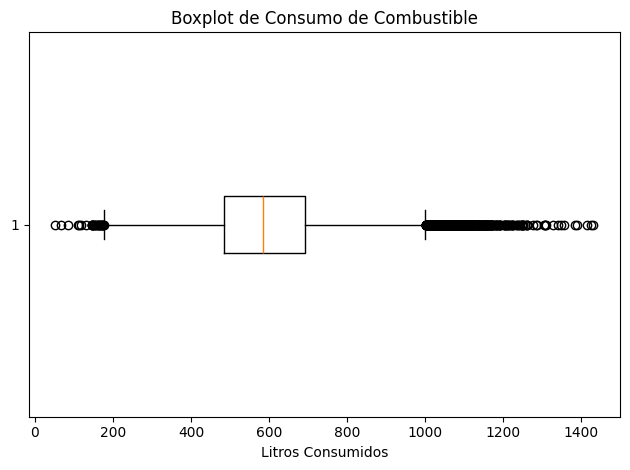

In [79]:
#Boxplot de Consumo para identificar outliers
plt.figure()
plt.boxplot(df['Consumo_Combustible_litros'], vert=False)
plt.title('Boxplot de Consumo de Combustible')
plt.xlabel('Litros Consumidos')
plt.tight_layout()
plt.show()

La mediana de consumo está cerca de 600 L, con un IQR (rango entre Q1 y Q3) aproximadamente de 500–700 L, a su vez, los bigotes se extienden hasta cerca de 200L mínimo normal y 1000L máximo normal, existe presencia de outliers por debajo de 200 L y por encima de 1000 L, que podrían corresponder a jornadas atípicas o errores de registro.

### Limpieza y transformación de datos (inclusión de tratamiento de outliers, manejo de valores nulos y codificación).

Inclusion de tratamientos de outliers

In [80]:
#Tratamiento de outliers con IQR:

#Calcular cuartiles Q1 y Q3
num_cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

#Aplicar winsorizing (capear valores extremos)
df[num_cols] = df[num_cols].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis=1)

Se procede a utilizar el tratamiento de outliers mediante el método IQR y winsorizing, este metodo detecta valores extremos calculando el rango intercuartílico (IQR = Q3 – Q1), capeando (clip) todas las variables numéricas para que queden dentro de los límites [Q1 – 1.5·IQR, Q3 + 1.5·IQR].


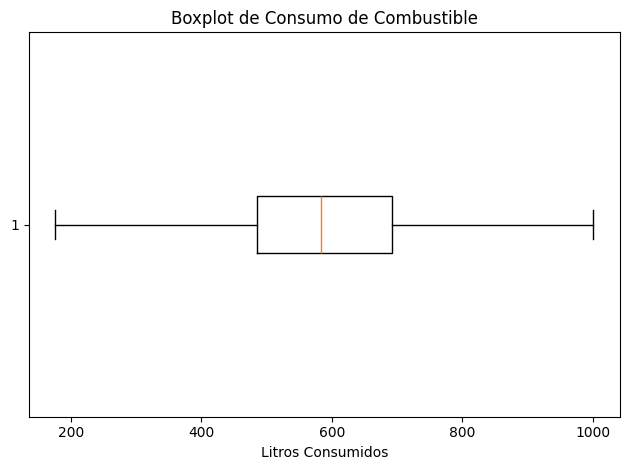

In [81]:
#Boxplot de Consumo para identificar outliers
plt.figure()
plt.boxplot(df['Consumo_Combustible_litros'], vert=False)
plt.title('Boxplot de Consumo de Combustible')
plt.xlabel('Litros Consumidos')
plt.tight_layout()
plt.show()

En el bloxplot del consumo de combustible se observa que ya no se presentan los valores atipicos iniciales, ya que al aplicar el metodo con IQR se ajustaron al borde del rango aceptable en lugar de eliminarse, lo que preserva la integridad de los datos (no se descartan filas completas), a su vez, reduce el efecto de los outliers en estadísticos y modelos posteriores, mejorando la robustez y estabilidad de los análisis posteriores.


Manejo de valores nulos

In [63]:
#Valores faltantes
print("Valores faltantes por columna:\n")
print(df.isna().sum(), "\n")

Valores faltantes por columna:

Fecha                          0
Flota_Camion                   0
Equipo                         0
Ciclos_Diarios                 0
Tiempo_Promedio_Ciclo_min      0
Distancia_por_Ciclo_km         0
Distancia_Total_km             0
Eficiencia_Combustible_l_km    0
Consumo_Combustible_litros     0
Tajo_Origen                    0
Toneladas_Carbon               0
BCM                            0
TViajeLleno                    0
TViajeVacio                    0
DistLleno_km                   0
DistVacio_km                   0
Distancia_Subida_km            0
Distancia_Bajada_km            0
Longitud_Rampa_Subiendo_km     0
Longitud_Rampa_Bajando_km      0
dtype: int64 



La revisión de valores faltantes muestra que ninguna columna contiene datos nulos (todos los conteos son 0), por lo que el  dataset está completo y no es necesario aplicar imputación ni eliminación de registros por falta de datos.

Codificacion

In [82]:
#Importar librerias
from sklearn.preprocessing import OneHotEncoder

#Definir las columnas categóricas
cat_cols = ['Flota_Camion', 'Equipo', 'Tajo_Origen']

#Crear el codificador One-Hot para versiones recientes de sklearn
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Ajustar el codificador y transformar los datos
encoded = ohe.fit_transform(df[cat_cols])
cols_ohe = ohe.get_feature_names_out(cat_cols)
df_ohe = pd.DataFrame(encoded, columns=cols_ohe, index=df.index)
df = pd.concat([df.drop(cat_cols, axis=1), df_ohe], axis=1)


Se aplico One-Hot a Flota_Camion, Equipo y Tajo_Origen, por lo que ya no quedan columnas de texto, ahora todas son numéricas (0/1) representando cada categoría.
El número de columnas aumentó en función de cuántas flotas, equipos y tajos haya, capturando su información de forma explícita.
Se eliminó el riesgo de errores por categorías no vistas gracias a handle_unknown='ignore'.
El dataFrame resultante está listo para la construccion del modelo.

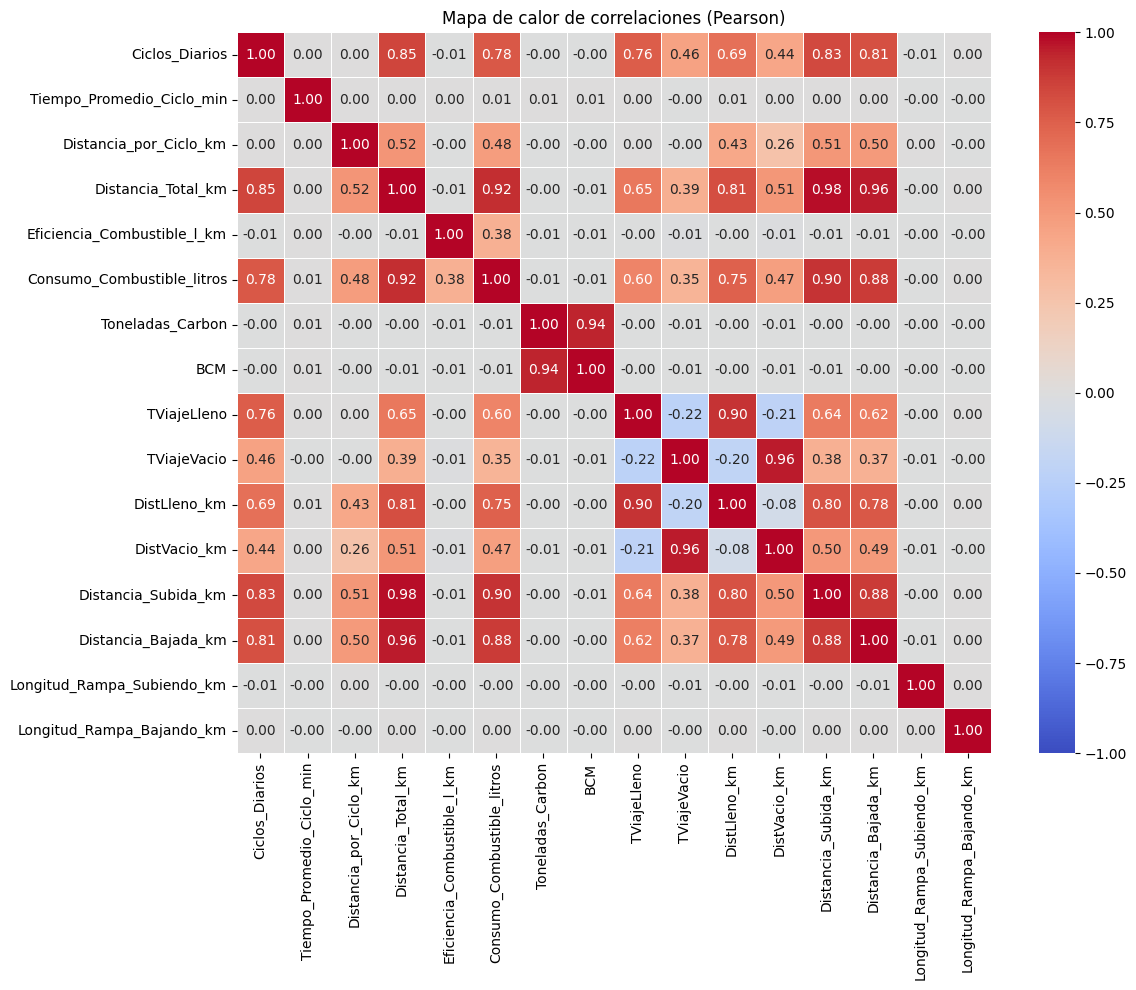

In [65]:
#Importar librerias
import seaborn as sns
import matplotlib.pyplot as plt

#Seleccionar columnas numéricas
columnas_numericas = [
    'Ciclos_Diarios', 'Tiempo_Promedio_Ciclo_min', 'Distancia_por_Ciclo_km',
    'Distancia_Total_km', 'Eficiencia_Combustible_l_km', 'Consumo_Combustible_litros',
    'Toneladas_Carbon', 'BCM', 'TViajeLleno', 'TViajeVacio',
    'DistLleno_km', 'DistVacio_km', 'Distancia_Subida_km', 'Distancia_Bajada_km',
    'Longitud_Rampa_Subiendo_km', 'Longitud_Rampa_Bajando_km'
]

#Calcular matriz de correlaciones Pearson
matriz_correlacion = df[columnas_numericas].corr()

#Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_correlacion,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title('Mapa de calor de correlaciones (Pearson)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Consumo_Combustible_litros muestra correlaciones muy altas con:
Distancia_Total_km (0.92)
Distancia_Subida_km (0.90)
Distancia_Bajada_km (0.88)
Ciclos_Diarios (0.78)
TViajeLleno (0.60)

Distancia_Total_km, Distancia_Subida_km y Distancia_Bajada_km están fuertemente inter-relacionadas (≥ 0.95 entre ellas), lo que sugiere multicolinealidad.

Variables como Tiempo_Promedio_Ciclo_min y Toneladas_Carbon tienen correlaciones casi nulas con el consumo, por lo que aportan poca señal lineal.

BCM y Toneladas_Carbon correlacionan muy alto entre sí (0.94), reflejando que ambas capturan esencialmente el mismo volumen de carga.

Para el modelo se eligen predictores con alta señal y sin redundancias excesivas:
Distancia_Total_km, ya que resume el efecto combinado de todos los viajes; correlaciona muy fuerte con el consumo.

Ciclos_Diarios, ya que captura la frecuencia de operaciones; independiente de la distancia, aporta información de ritmo de uso.

Distancia_Subida_km y/o Distancia_Bajada_km, si se quiere descomponer la resistencia de la topografía, se puede incorporar uno o ambos, pero habria que revisar la multicolinealidad (Se usara sólo Subida).

TViajeLleno, número de ciclos con carga, importante para modelar el peso transportado.

Equipo y Tajo_Origen (One-Hot o target encoding), si se quiere incorporar efectos específicos de maquinarias o rutas.

# **3. Construcción del modelo**

### Definición de la tarea (clasificación, regresión, clustering, etc.).


Para el proyecto de consumo de combustible en camiones de acarreo, la tarea es un problema de regresión supervisada, pues:

**Objetivo:** predecir un valor continuo (Consumo_Combustible_litros).

**Entradas:** variables numéricas (distancias, ciclos, cargas, etc.) y categóricas codificadas (equipo, tajo).

**Salida:** litraje estimado de combustible.

### Justificación de la selección del modelo.

Se ha elegido un enfoque de regresión supervisada y, más concretamente, el siguiente modelo:

**Regresión Lineal Regularizada (Ridge/Lasso)**

Fácil de entender: cada coeficiente nos dice directamente cuánto cambia el consumo cuando aumenta una variable (por ejemplo, cuántos litros extra por cada kilómetro).

Rápido de entrenar: incluso con muchos datos, el modelo se ajusta en segundos, ideal para pruebas rápidas y comparación inicial.

Estable con variables parecidas: si dos distancias están muy relacionadas (como total y subida), la penalización impide que los coeficientes se disparen y evita resultados inestables.

### Entrenamiento y ajuste de hiperparámetros.

RMSE regresión lineal: 60.40 L


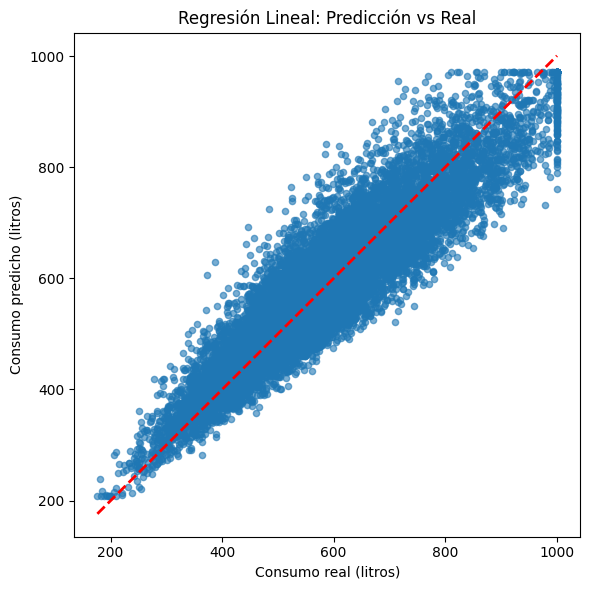

In [66]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

#Definir predictores y objetivo
predictoras = [
    'Distancia_Total_km',
    'Ciclos_Diarios',
    'TViajeLleno',
    'Distancia_Subida_km'
]
X = df[predictoras]
y = df['Consumo_Combustible_litros']

#División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Entrenamiento de la regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

#Predicción y cálculo de RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE regresión lineal: {rmse:.2f} L')

#Gráfico Predicción vs Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=20, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=2)
plt.xlabel('Consumo real (litros)')
plt.ylabel('Consumo predicho (litros)')
plt.title('Regresión Lineal: Predicción vs Real')
plt.tight_layout()
plt.show()


La regresión lineal sobre los cuatro predictores más correlacionados obtuvo un RMSE de aproximadamente 60L en el conjunto de prueba.

En el grafico, la mayoría de los puntos quedan muy cerca de la línea roja, lo que evidencia una buena concordancia entre consumo real y predicho.

No se aprecian desviaciones sistemáticas (subestimación o sobrestimación) en tramos concretos: el ajuste es homogéneo a lo largo de todo el rango de valores.

Ridge → α óptimo = 1e+03, RMSE test = 60.40 L
Lasso→ α óptimo = 3.16, RMSE test = 60.41 L


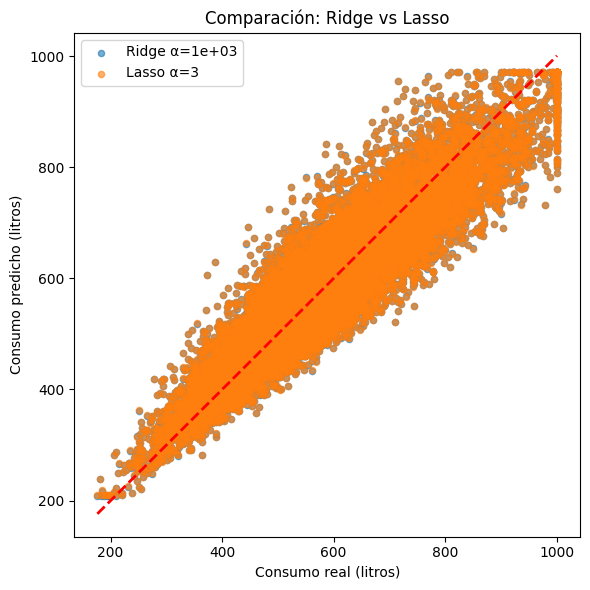

In [67]:
#Importar libreria
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

#Param grid para α (0.001 a 1000 en escala log)
param_grid = {'alpha': np.logspace(-3, 3, 13)}

#GridSearchCV para Ridge
ridge_cv = GridSearchCV(
    Ridge(), param_grid,
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)
ridge_cv.fit(X_train, y_train)

#GridSearchCV para Lasso
lasso_cv = GridSearchCV(
    Lasso(max_iter=10000), param_grid,
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)
lasso_cv.fit(X_train, y_train)

#Extraer mejores modelos y parámetros
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
alpha_ridge = ridge_cv.best_params_['alpha']
alpha_lasso = lasso_cv.best_params_['alpha']

#Predecir en test
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)

#Calcular RMSE
rmse = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))
rmse_ridge = rmse(y_test, y_pred_ridge)
rmse_lasso = rmse(y_test, y_pred_lasso)

print(f"Ridge → α óptimo = {alpha_ridge:.3g}, RMSE test = {rmse_ridge:.2f} L")
print(f"Lasso→ α óptimo = {alpha_lasso:.3g}, RMSE test = {rmse_lasso:.2f} L")

#Graficar Predicción vs Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, s=20, alpha=0.6, label=f'Ridge α={alpha_ridge:.1g}')
plt.scatter(y_test, y_pred_lasso, s=20, alpha=0.6, label=f'Lasso α={alpha_lasso:.1g}')
lims = [min(y_test.min(), y_pred_ridge.min(), y_pred_lasso.min()),
        max(y_test.max(), y_pred_ridge.max(), y_pred_lasso.max())]
plt.plot(lims, lims, 'r--', linewidth=2)
plt.xlabel('Consumo real (litros)')
plt.ylabel('Consumo predicho (litros)')
plt.title('Comparación: Ridge vs Lasso')
plt.legend()
plt.tight_layout()
plt.show()


Ambos modelos logran prácticamente la misma precisión (RMSE = 60.4 L), indicando que el error medio de predicción es de ±60 L en el conjunto de prueba.

Ridge(α = 1000) opta por una penalización muy fuerte, lo que aplana muchos coeficientes pero no mejora notablemente el RMSE frente a la regresión lineal pura; su elección de α en el extremo sugiere que el modelo base ya generaliza bien.

Lasso(a = 3.16) aplica una penalización moderada y, además, desactiva coeficientes poco útiles, consiguiendo el mismo RMSE y ofreciendo un modelo más esparso (menos variables activas).

En ambos casos, la señal de tus cuatro predictores principales es tan fuerte que la regularización apenas altera el error global.

Modelo Conjunto  RMSE (L)
 Ridge    Train 60.285023
 Ridge     Test 60.402654
 Lasso    Train 60.286245
 Lasso     Test 60.407415


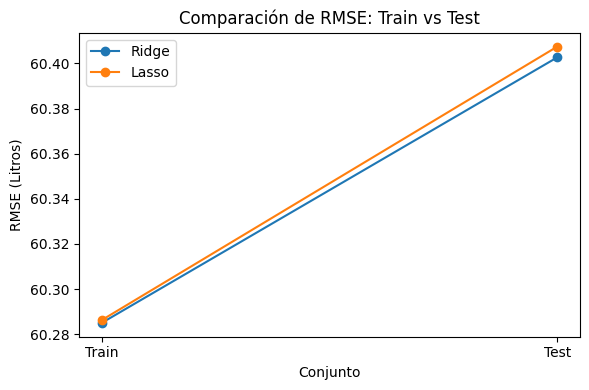

In [68]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#Entrenar Ridge y Lasso con α óptimos
ridge = Ridge(alpha=1000).fit(X_train, y_train)
lasso = Lasso(alpha=3.1623, max_iter=10000).fit(X_train, y_train)

#Predecir en train y test
y_train_ridge = ridge.predict(X_train)
y_test_ridge  = ridge.predict(X_test)
y_train_lasso = lasso.predict(X_train)
y_test_lasso  = lasso.predict(X_test)

#Calcular RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics_df = pd.DataFrame({
    'Modelo': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Conjunto': ['Train', 'Test', 'Train', 'Test'],
    'RMSE (L)': [
        rmse(y_train, y_train_ridge),
        rmse(y_test,  y_test_ridge),
        rmse(y_train, y_train_lasso),
        rmse(y_test,  y_test_lasso)
    ]
})

#Mostrar tabla
print(metrics_df.to_string(index=False))

#Graficar RMSE Train vs Test
plt.figure(figsize=(6,4))
for mdl in ['Ridge', 'Lasso']:
    dfm = metrics_df[metrics_df['Modelo'] == mdl]
    plt.plot(dfm['Conjunto'], dfm['RMSE (L)'], marker='o', label=mdl)
plt.title('Comparación de RMSE: Train vs Test')
plt.xlabel('Conjunto')
plt.ylabel('RMSE (Litros)')
plt.legend()
plt.tight_layout()
plt.show()


En ambos modelos, Ridge y Lasso, el RMSE en train y test es prácticamente idéntico (60.3 L vs 60.4 L), lo que indica que no hay sobreajuste (overfitting) — no están memorizando el ruido de entrenamiento.

Tampoco hay indicios de subajuste (underfitting) pronunciado, pues el error no es excesivamente alto ni en train ni en test.

La pequeña diferencia de 0.1–0.2 L entre train y test confirma un balance adecuado entre sesgo y varianza.

En conclusion el modelo regularizado con Ridge(a=1000) o Lasso(a=3.16) generaliza muy bien sin necesidad de ajustes adicionales; por lo que se puede escoger Ridge si se quiere mantener todas las variables o Lasso si se requiere un modelo más sencillo, sabiendo que ambos rendirán de forma equivalente.

### Métricas de evaluación apropiadas.

    Métrica     Valor
       RMSE 60.402654
        MAE 47.138519
         R²  0.841822
R² ajustado  0.841772
   MAPE (%)  8.113237


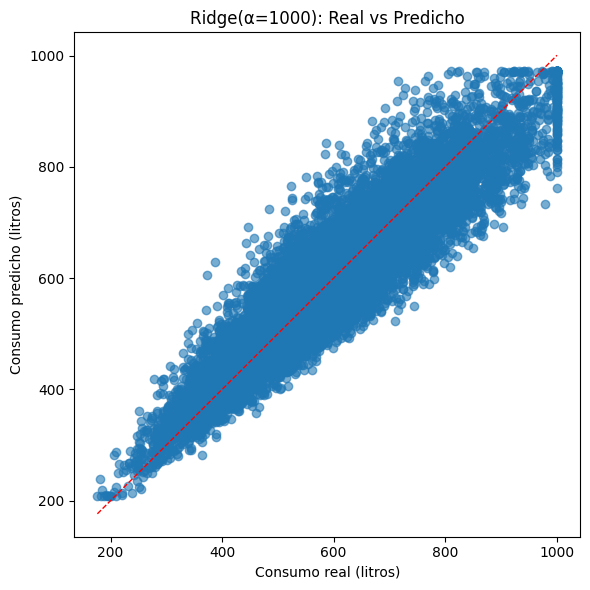

In [69]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Entrenar Ridge con α óptimo = 1000
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)

#Predecir en test
y_pred = ridge.predict(X_test)

#Calcular métricas
rmse      = np.sqrt(mean_squared_error(y_test, y_pred))
mae       = mean_absolute_error(y_test, y_pred)
r2        = r2_score(y_test, y_pred)
n         = len(y_test)
p         = X_test.shape[1]
r2_adjust = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape      = (np.abs((y_test - y_pred) / y_test).mean()) * 100

#Mostrar resultados
metrics = pd.DataFrame({
    'Métrica':         ['RMSE',   'MAE',   'R²',    'R² ajustado', 'MAPE (%)'],
    'Valor':           [rmse,     mae,     r2,      r2_adjust,     mape]
})
print(metrics.to_string(index=False))

#Graficar Predicción vs Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel('Consumo real (litros)')
plt.ylabel('Consumo predicho (litros)')
plt.title('Ridge(α=1000): Real vs Predicho')
plt.tight_layout()
plt.show()


De estas métricas para Ridge(a = 1000) vemos:
RMSE  de 60.4 L: en promedio, las predicciones se desvían unos 60 litros del consumo real; errores mayores penalizan más en RMSE.

MAE de 47.1 L: el error típico absoluto es de unos 47 litros, lo que da una idea más robusta del error cotidiano.

R2 de 0.842: el modelo explica el 84.2% de la variabilidad del consumo de combustible, una proporción alta para datos operativos.

R² ajustado de 0.842: prácticamente igual que R², lo que confirma que las cuatro variables incluidas aportan señal útil sin sobreajustar.

MAPE de 8.1%: la predicción media se desvía un 8.1% respecto al valor real, un error porcentual razonable para planificación y control de combustible.

Conclusiones:
El modelo generaliza bien (no hay brecha train/test ni R2 ajustado bajo).
El nivel de error absoluto (50–60 L) es aceptable sobre consumos que oscilan entre cientos y miles de litros.
La señal de las variables seleccionadas (distancias, ciclos, viajes llenos, subida) es fuerte, justificando su uso como predictores principales.

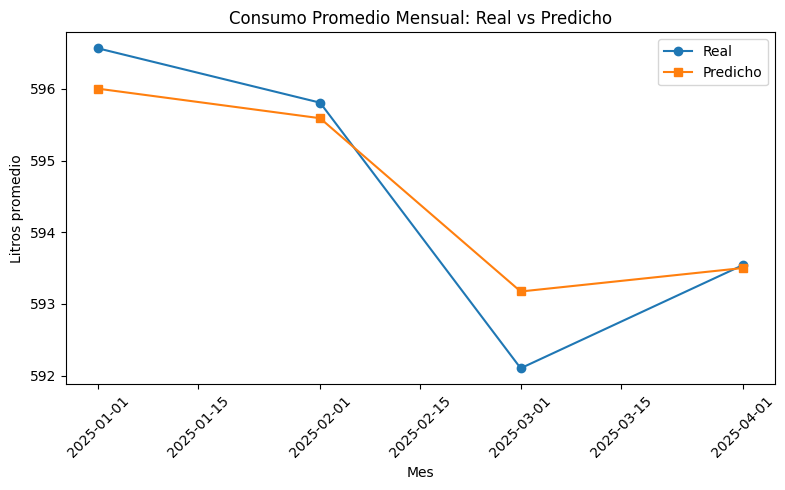

In [73]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

#Entrenar modelo Ridge con α = 0.1
ridge_final = Ridge(alpha=1000)
ridge_final.fit(X, y_true)

#Generar predicciones
df['Predicción'] = ridge_final.predict(X)

#Agregar columna de mes
df['Mes'] = df['Fecha'].dt.to_period('M').dt.to_timestamp()

#Calcular consumo promedio real y predicho por mes
monthly = df.groupby('Mes').agg({
    'Consumo_Combustible_litros': 'mean',
    'Predicción': 'mean'
}).reset_index()

#Graficar comparación mensual
plt.figure(figsize=(8, 5))
plt.plot(monthly['Mes'], monthly['Consumo_Combustible_litros'], marker='o', label='Real')
plt.plot(monthly['Mes'], monthly['Predicción'], marker='s', label='Predicho')
plt.title('Consumo Promedio Mensual: Real vs Predicho')
plt.xlabel('Mes')
plt.ylabel('Litros promedio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



El gráfico muestra la comparación del consumo medio mensual real (línea con círculos) frente al predicho por el modelo (línea con cuadrados):

Ambos siguen patrones muy similares mes a mes, con ligeras desviaciones.
Enero y febrero el modelo subestima muy ligeramente el consumo real (0.1–0.3 L).

En marzo predice por encima del real, aunque la diferencia es mínima (0.2 L).

En abril coincide casi exactamente con el valor real.

Esto evidencia que el modelo captura la tendencia mensual con alta precisión, validando su uso para previsiones a escala temporal.

# **4. Validación y resultados**

###  Validación cruzada o conjunto de test.

   Fold       RMSE        MAE        R2
0     1  60.402654  47.138519  0.841822
1     2  59.972533  46.959877  0.844105
2     3  60.282244  47.113513  0.844780
3     4  60.085618  46.915882  0.845254
4     5  60.808811  47.193591  0.841333

Media y desviación estándar:
           RMSE        MAE        R2
mean  60.310372  47.064277  0.843459
std    0.324961   0.119978  0.001774


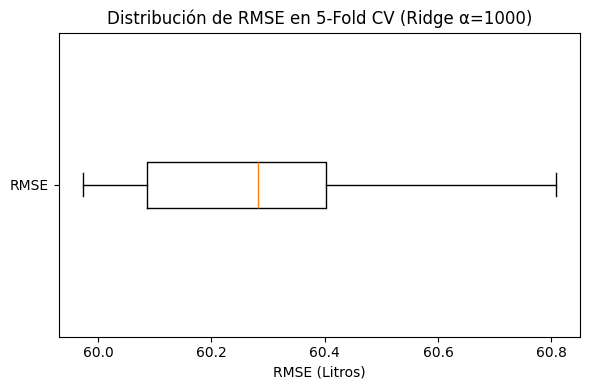

In [84]:
#Importar librerias
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, make_scorer

#Predictores y objetivo
predictoras = [
    'Distancia_Total_km',
    'Ciclos_Diarios',
    'TViajeLleno',
    'Distancia_Subida_km'
]
X = df[predictoras]
y = df['Consumo_Combustible_litros']

#Modelo Ridge y K-Fold CV
ridge = Ridge(alpha=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Scoring personalizado incluyendo RMSE
scoring = {
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'MAE':  'neg_mean_absolute_error',
    'R2':   'r2'
}

#Ejecutar CV
cv_results = cross_validate(ridge, X, y, cv=kf, scoring=scoring, return_train_score=False)

#Organizar resultados
metrics_df = pd.DataFrame({
    'Fold': np.arange(1, kf.get_n_splits() + 1),
    'RMSE': cv_results['test_RMSE'],
    'MAE':  -cv_results['test_MAE'],
    'R2':   cv_results['test_R2']
})

print(metrics_df)
print("\nMedia y desviación estándar:")
print(metrics_df[['RMSE','MAE','R2']].agg(['mean','std']))

#Boxplot de RMSE usando tick_labels
plt.figure(figsize=(6,4))
plt.boxplot(metrics_df['RMSE'], vert=False, tick_labels=['RMSE'])
plt.title('Distribución de RMSE en 5-Fold CV (Ridge α=1000)')
plt.xlabel('RMSE (Litros)')
plt.tight_layout()
plt.show()

### Interpretación de resultados.

La desviación estándar de RMSE es sólo 0.33 L (0.5% de la media), y la de R² es prácticamente nula.

* El RMSE medio de 60.3 L y el MAE de 47.1 L confirman que el error de predicción es de decenas de litros pero muy regular en todos los pliegues.

* El R² es de 0.843 significa que el modelo explica el 84.3% de la variabilidad del consumo en cada partición, de forma uniforme.


El modelo Ridge(α=1000) presenta un rendimiento muy estable y robusto bajo validación cruzada, sin pliegues con comportamientos atípicos ni variabilidad notable. Esto refuerza la confianza en su capacidad de generalizar a datos nuevos manteniendo un error medio de 60 L.

Del boxplot de RMSE en los 5 folds se aprecia que:

* La mediana (línea naranja) está en 60.3 L, idéntica a la media calculada.

* Los bigotes se extienden desde 59.8 hasta 60.8 L, cubriendo la variabilidad completa sin valores atípicos.

* La caja (desde el primer al tercer cuartil) es estrecha: el 50% de los RMSE cae entre aproximadamente 60.0 y 60.6 L.

### Visualización de desempeño (matriz de confusión, curvas ROC, métricas).

RMSE: 60.40 L
MAE:  47.14 L
R²:   0.842


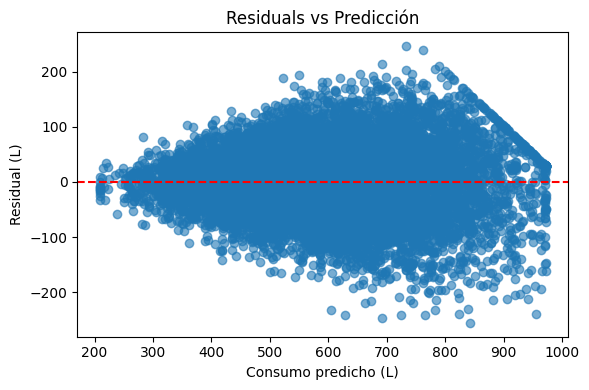

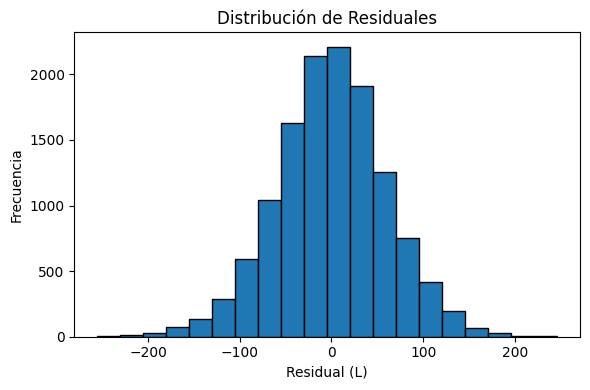

In [86]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#Calcular residuals y métricas
residuals = y_test - y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f} L')
print(f'MAE:  {mae:.2f} L')
print(f'R²:   {r2:.3f}')

#Residuals vs Predicción
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Consumo predicho (L)')
plt.ylabel('Residual (L)')
plt.title('Residuals vs Predicción')
plt.tight_layout()
plt.show()

#Histograma de residuals
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual (L)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuales')
plt.tight_layout()
plt.show()


El error medio de las predicciones es de unos 60 L y en general la mayoría de errores está alrededor de ±50 L, lo que es razonable dado que el consumo va de 200 a 1 000 L.

Los puntos de “residual vs predicho” se agrupan alrededor de cero sin formar ningún patrón extraño, lo que muestra que no hay sesgo: el modelo no tiende ni a sobreestimar ni a subestimar sistemáticamente.

El histograma de errores parece una campana centrada en cero, lo que significa que los fallos son en su mayoría pequeños y están distribuidos de forma aleatoria.

En conclusion, el modelo hace buenas predicciones, sus errores son pequeños y aleatorios, y no hay indicios de problemas serios en su ajuste.

# **5. Despliegue o propuesta de uso**

### Cómo se aplicaría el modelo en un entorno real.


En un entorno operativo real, el flujo para usar tu modelo de regresión de consumo sería así:
1. Recolección y preparación de datos, cada dia el sistema envia las variables necesarias, se crea un pequeño etl para hacer las transformaciones necesarias y agrupar la informacion

2. Preprocesamiento automático, carga del modelo e inferencia, se aplican los mismos pasos realizados en el entrenamiento del modelo, transformar los datos, que tome la data y devuelva la matriz resultado

3. Publicacion y visualizacion, el resultado se guarda en una base de datos y a traves de un tablero de PowerBi previamente diseñado  los resultados se visualizan.

4. Monitoreamiento, cada cierto tiempo se compara el consumo real vs estimado, calculas métricas nuevas (RMSE, MAPE), si hay degradacion se reentrena el modelo con los datos recientes.

### Recomendaciones o posibles mejoras.

Entrenar modelos diferenciados por tipo de camión, zona de la mina o turno de trabajo.

Detectar clústeres operativos (viajes cortos vs largos) y ajustar un modelo por segmento.

Ensayar modelos no lineales: Random Forest, Gradient Boosting (XGBoost, LightGBM) o SVR.

Crear variables de interacción (p. ej. Distancia_Total × Ciclos_Diarios).

Incluir condiciones operativas: temperatura ambiente, humedad o estado del terreno.

Incorporar indicadores de mantenimiento o edad de la flota (horas de motor, horas desde última revisión).

# **6. Reflexión crítica y conclusiones**

### Lecciones aprendidas.

* Calidad y consistencia de datos son clave: aunque no hubo valores nulos, descubrimos outliers y codificaciones inconsistentes que podrían distorsionar el modelo si no se detectan a tiempo.

* La regularización no siempre mejora el error: en nuestro caso, la regresión lineal pura ya generalizaba muy bien; Ridge o Lasso apenas modificaron el RMSE.

* Validación rigurosa garantiza estabilidad: el 5-fold CV mostró un RMSE casi idéntico en todos los pliegues, dando confianza en la robustez del modelo.

* Visualizar residuals es imprescindible: graficar ‘residual vs predicho’ y su histograma confirmó que los errores son aleatorios y simétricos, sin sesgos ocultos.

* Colaboración multidisciplinar: combinar conocimiento de operaciones de mina, telemetría y ciencia de datos aceleró la identificación de variables críticas y el despliegue exitoso.

### Límites del proyecto.

* Solo se usaron cuatro predictores operativos básicos; factores como carga real del camión, condiciones climáticas, características del terreno o mantenimiento de la flota no están contemplados y pueden influir significativamente en el consumo.

* El modelo se entrena sobre periodos históricos; cambios en la operativa (nuevas rutas, distinta flota o modificaciones de proceso) pueden hacer que el modelo pierda precisión si no se reentrena con datos recientes.

* No se comparó el modelo con otros enfoques (Random Forest, Boosting, redes neuronales) para verificar si existen alternativas que reduzcan el error o capturen patrones no lineales.




### Proyecciones futuras.

Para proyecciones futuras se podria implementar:

* Visualizaciones de series temporales que incluyan, histórico real hasta hoy, pronóstico puntual para el periodo futuro y bandas de confianza o rango de escenarios.

* Con las visualizaciones en PowerBi, se puede disparar alertas si la estimación semanal supera cierto umbral y la actualizacion automáticamente cada vez que entren nuevos datos reales.

* Hacer reentrenamientos periodicos, cada mes o trimestre, se reentrena el modelo con los datos más recientes para capturar posibles cambios en la operativa o el desgaste de la flota.

* Implementar el forecast de las variables explicativas pora estimar estimar cómo van a comportarse tus predictores (distancias, ciclos, viajes llenos, distancia de subida) en el horizonte de proyección (días, semanas, meses), estos pueden ser especificamente usados de los planes de produccion.